In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys, os

sys.path.insert(0, ".")
os.chdir("..")
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [3]:
import torch
import numpy as np
import glob
import pickle
import tqdm.auto as tqdm
import matplotlib.pyplot as plt

from latex_decompiler.cleanup import remove_steps_from_all
from latex_decompiler.monitoring import plot_all_curves

from pixel_art.analysis.latex_experiment import (
    models,
    test_data,
    mean_num_characters,
    sparsity_bar,
    latex_dset_spec,
)
from latex_decompiler.splicing.splicing_model import SplicingLSSI
from pixel_art.analysis.evaluate_motifs import (
    confusion_from_results,
    display_confusion,
    realign_confusion,
)
from pixel_art.analysis.latex_experiment import display_grouped_confusion
from pixel_art.analysis.evaluate_motifs import errors_from_confusion_without_multi

In [4]:
splicing_models = {
    # "SplicingLM": ("spl-1a2", 4, 80),
    # "SplicingLM + slow": ("spl-1b2", 4, 80),
    "w/o LSSI": ("spl-1c2", 4, 80),
    # "SplicingLM-splicepoint residual": ("spl-2a2", 4, 80),
    # "SplicingLM-splicepoint residual + slow": ("spl-2b2", 4, 80),
#     "w/ LSSI": ("spl-2c2", 4, 80),
}

In [5]:
target_density = 0.5 * 0.75 ** 19

In [6]:
# name = "SplicingLM"
# seed = 1
# mod = load_sparse_model_for_sparsity(f"{splicing_models[name][0]}_{seed}", target_density=target_density).eval()

In [7]:
batch_size = 16

In [8]:
from latex_decompiler.splicing.splicing_dataset import SplicingDataset
dset = SplicingDataset(is_training=False, seed=1)

In [9]:
from more_itertools import chunked
import itertools

In [10]:
import os
from latex_decompiler.splicing.evaluation import *

checkpoint_key = f"{target_density:.6e}"

results = defaultdict(list)
for seed in range(1, 4 + 1):
    for name in splicing_models:
        model_name = f"{splicing_models[name][0]}_{seed}"
        checkpoint_path = os.path.join("selected_checkpoints", model_name, checkpoint_key)
        if not os.path.exists(checkpoint_path):
            continue
        print(name, seed, checkpoint_key)
        res = results_for(model_name, checkpoint_key, num_controls=10)
        print({x: res[x] for x in ('e2e',)})
        results[name].append(res)
results = dict(results.items())

w/o LSSI 1 2.114141e-03
{'e2e': 0.7901882567009588}
w/o LSSI 2 2.114141e-03
{'e2e': 0.7901882567009588}
w/o LSSI 3 2.114141e-03
{'e2e': 0.7879837637343411}
w/o LSSI 4 2.114141e-03
{'e2e': 0.8060746028413466}


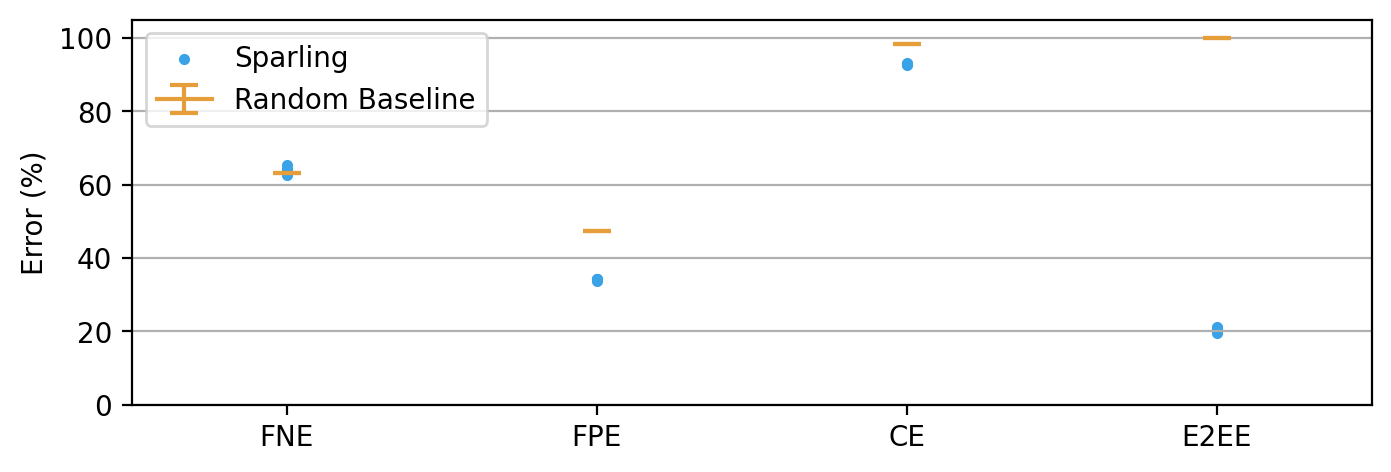

In [11]:
plt.figure(dpi=200, figsize=(8, 2.5), facecolor="white")
plot_errors(plt.gca(), results["w/o LSSI"], "no_3p5p")
plt.savefig("output/on-splicing.png", facecolor="white", dpi=200)
plt.show()